In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc, mean_absolute_error

In [2]:
lc = pd.read_excel("0213final_results.xlsx")
lc.head()

,Unnamed: 0,loan_amnt,grade,loan_length,total_pymnt,last_pymnt_d,recoveries,return_num,B,C,...,std,return_num2,Ai*ri,Ai*ri-β*σ*Ai,Def_rank,ri_rank,Ai*ri_rank,β=,0.5,beta_rank
0,16218,27000,C,10.053595,30119.38000,2015-01-01,23746.98,0.053349,0.0000,0.9332,...,0.068374,1.187695,32067.766314,31144.717314,3685,2,1,NaN,NaN,1
1,7575,19475,B,13.010534,22167.14000,2015-11-01,14983.06,0.057243,0.5327,0.0000,...,0.052777,0.837092,16302.359178,15788.443141,3261,3,2,NaN,NaN,2
2,7520,35000,F,27.959506,49070.03000,2014-06-01,23562.86,0.109192,0.0000,0.0000,...,0.099833,0.461478,16151.740098,14404.662598,6849,9,3,NaN,NaN,3
3,11200,35000,D,1.018501,36078.92272,2017-11-01,0.00,0.038882,0.0000,0.0000,...,0.078910,0.363197,12711.884884,11330.959884,6535,14,4,NaN,NaN,5
4,9528,3600,C,3.022649,3400.06000,2012-06-01,3149.50,0.017811,0.0000,0.9332,...,0.068374,3.252731,11709.833350,11586.760150,3461,1,5,NaN,NaN,4


In [3]:
lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 36 columns):
Unnamed: 0         7494 non-null int64
loan_amnt          7494 non-null int64
grade              7494 non-null object
loan_length        7494 non-null float64
total_pymnt        7494 non-null float64
last_pymnt_d       7494 non-null datetime64[ns]
recoveries         7494 non-null float64
return_num         7494 non-null float64
B                  7494 non-null float64
C                  7494 non-null float64
D                  7494 non-null float64
E                  7494 non-null float64
F                  7494 non-null float64
G                  7494 non-null float64
dti                7494 non-null float64
fico_avg           7494 non-null float64
emp_length         7494 non-null float64
revol_bal          7494 non-null float64
term_num           7494 non-null float64
funded_amnt_ori    7494 non-null int64
funded_amnt        7494 non-null float64
annual_inc         7494 non-null

In [3]:
lc.columns

Index([     'Unnamed: 0',       'loan_amnt',           'grade',
           'loan_length',     'total_pymnt',    'last_pymnt_d',
            'recoveries',      'return_num',               'B',
                     'C',               'D',               'E',
                     'F',               'G',             'dti',
              'fico_avg',      'emp_length',       'revol_bal',
              'term_num', 'funded_amnt_ori',     'funded_amnt',
            'annual_inc',      'issue_year',        'int_rate',
               'default',       'def_proba',             'std',
           'return_num2',           'Ai*ri',    'Ai*ri-β*σ*Ai',
              'Def_rank',         'ri_rank',      'Ai*ri_rank',
                    'β=',               0.5,       'beta_rank'],
      dtype='object')

Def_Average return(top100):  0.039931390760000005
Airi_Average return:  0.11649520974000005
Beta_Average return:  0.12412830627000002
the best Beta=0.725


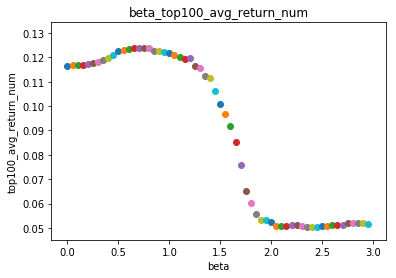

In [4]:
Def_loans_id = lc["def_proba"].argsort()[::1][:100] #逆序，从大到小排列，取前100个
Def_true_return = lc['return_num'][Def_loans_id]
print("Def_Average return(top100): ", np.mean(Def_true_return))

Airi_loans_id = (lc["funded_amnt_ori"]*lc["return_num"]).argsort()[::-1][:100] #逆序，从大到小排列，取前100个
Airi_true_return = lc['return_num'][Airi_loans_id]
print("Airi_Average return: ", np.mean(Airi_true_return))

Beta_loans_id = (lc["funded_amnt_ori"]*lc["return_num"]-0.725*lc["std"]*lc["funded_amnt_ori"]).argsort()[::-1][:100]
Beta_true_return = lc['return_num'][Beta_loans_id]
print("Beta_Average return: ", np.mean(Beta_true_return))
print("the best Beta=0.725")
def beta_method(beta):
    beta_orientation = lc["funded_amnt_ori"]*lc["return_num"]-beta*lc["std"]*lc["funded_amnt_ori"]
    beta_loans_id = beta_orientation.argsort()[::-1][:100]
    beta_true_return = lc["return_num"][beta_loans_id]
    return np.mean(beta_true_return)

beta_range = range(0,60)
for k in beta_range:
    beta = k/20
    result = beta_method(beta)
    #print(beta)
    #print("Beta_Average return: ", result)
    plt.scatter(beta,result)
plt.title('beta_top100_avg_return_num')
plt.xlabel('beta')
plt.ylabel('top100_avg_return_num')
plt.show()

Def_Average return2(top100):  0.04192669873934752
Airi_Average return2:  0.2777216070607596
Beta_Average return2:  0.31683468860479524
the best Beta=2.220


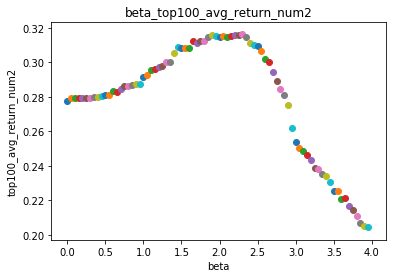

In [5]:
Def_loans_id = lc["def_proba"].argsort()[::1][:100] #逆序，从大到小排列，取前100个
Def_true_return = lc['return_num2'][Def_loans_id]
print("Def_Average return2(top100): ", np.mean(Def_true_return))

Airi_loans_id = (lc["funded_amnt_ori"]*lc["return_num2"]).argsort()[::-1][:100] #逆序，从大到小排列，取前100个
Airi_true_return = lc['return_num2'][Airi_loans_id]
print("Airi_Average return2: ", np.mean(Airi_true_return))

Beta_loans_id = (lc["funded_amnt_ori"]*lc["return_num2"]-2.220*lc["std"]*lc["funded_amnt_ori"]).argsort()[::-1][:100]
Beta_true_return = lc['return_num2'][Beta_loans_id]
print("Beta_Average return2: ", np.mean(Beta_true_return))
print("the best Beta=2.220")

def beta_method2(beta):
    beta_orientation = lc["funded_amnt_ori"]*lc["return_num2"]-beta*lc["std"]*lc["funded_amnt_ori"]
    beta_loans_id = beta_orientation.argsort()[::-1][:100]
    beta_true_return = lc["return_num2"][beta_loans_id]
    return np.mean(beta_true_return)

beta_range = range(0,80)
for k in beta_range:
    beta = k/20
    result = beta_method2(beta)
    #print(beta)
    #print("Beta_Average return: ", result)
    plt.scatter(beta,result)
plt.title('beta_top100_avg_return_num2')
plt.xlabel('beta')
plt.ylabel('top100_avg_return_num2')
plt.show()

In [101]:
def beta_method2(beta):
    beta_orientation = lc["funded_amnt_ori"]*lc["return_num2"]-beta*lc["std"]*lc["funded_amnt_ori"]
    beta_loans_id = beta_orientation.argsort()[::-1][:100]
    beta_true_return = lc["return_num2"][beta_loans_id]
    return np.mean(beta_true_return)

2.204
Beta_Average return:  0.3156819851435333
2.205
Beta_Average return:  0.3160025794384418
2.206
Beta_Average return:  0.31683468860479524
2.207
Beta_Average return:  0.31683468860479524
2.208
Beta_Average return:  0.31683468860479524
2.209
Beta_Average return:  0.31683468860479524
2.21
Beta_Average return:  0.31683468860479524
2.211
Beta_Average return:  0.31683468860479524
2.212
Beta_Average return:  0.31683468860479524
2.213
Beta_Average return:  0.31683468860479524
2.214
Beta_Average return:  0.31683468860479524
2.215
Beta_Average return:  0.31683468860479524
2.216
Beta_Average return:  0.31683468860479524
2.217
Beta_Average return:  0.31683468860479524
2.218
Beta_Average return:  0.31683468860479524
2.219
Beta_Average return:  0.31683468860479524
2.22
Beta_Average return:  0.31683468860479524
2.221
Beta_Average return:  0.31683468860479524
2.222
Beta_Average return:  0.31683468860479524
2.223
Beta_Average return:  0.31683468860479524


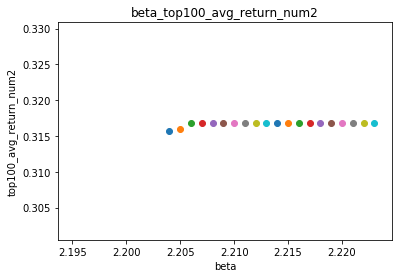

In [108]:
beta_range = range(2204,2224)
for k in beta_range:
    beta = k/1000
    result = beta_method2(beta)
    print(beta)
    print("Beta_Average return: ", result)
    plt.scatter(beta,result)
plt.title('beta_top100_avg_return_num2')
plt.xlabel('beta')
plt.ylabel('top100_avg_return_num2')
plt.show()